## Integrasjon

### Analytisk

Referanse: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html

In [3]:
import scipy.integrate as integrate


def f(x):  # Definerer en funksjon som vi skal integrere.
    return x**3-1


nedra_grense = 2
ovre_grense = 5

areal = integrate.quad(f, nedra_grense, ovre_grense)
print("Analytisk verdi:", areal)


Analytisk verdi: (149.25, 1.6570078642530461e-12)


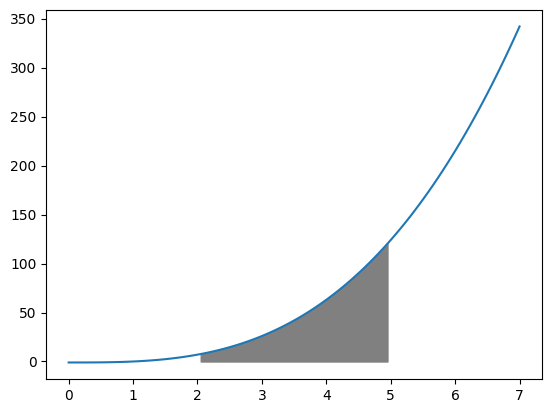

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x_fra = 0
x_til = 7
punkter = 100
x = np.linspace(x_fra, x_til, punkter)

fig, ax = plt.subplots()

ax.plot(x, f(x))

plt.fill_between(x, f(x),  where=(x > nedra_grense)
                 & (x < ovre_grense), color='gray')

plt.show()


### Numerisk - med kjent funksjon

In [5]:
import scipy.integrate as integrate


def f(x):  # Definerer en funksjon som vi skal integrere.
    return x**2 - 2*x + 2


fra = 1
til = 4
n = 1000


In [6]:
# Midtpunkt intervall

def midtpunkt_metoden(f, a, b, n):
    """ Metoden innebærer å dele intervallet inn i mindre delintervaller 
    og deretter finne midtpunktet av hvert delintervall. 
    Deretter multipliseres funksjonsverdien i midtpunktet med bredden av delintervallet, 
    og disse produktene summeres for å gi en tilnærming til integralet over hele intervallet.

    Args:
        f (function): funksjon som skal integreres
        a (float): venstre intervallgrense
        b (float): høyre intervallgrense
        n (int): antall delintervaller

    Returns:
        float: integral av funksjonen.
    """

    h = (b-a) / n                # bredde rektangel
    m = a + h / 2                # midtpunkt 1. rektangel
    integral = h * f(m)             # areal 1. rektangel
    for i in range(1,n):         # løkke for øvrige rektangler
        m += h                   # m blir neste midtpunkt
        integral += h * f(m)        # legger til areal for rektangel nr i 
    return integral

# Test
print("Numerisk verdi (midtpunkt):", midtpunkt_metoden(f, fra, til, n))


Numerisk verdi (midtpunkt): 11.99999775000003


In [7]:

def rektangel_metoden(f, a, b, n):
    """ Metoden består i å dele intervallet inn i like store delintervaller og 
    tilnærme integralet ved å multiplisere funksjonsverdien i midten av hvert delintervall med bredden av delintervallet. 
    Disse produktene summeres deretter for å gi en tilnærming til integralet over hele intervallet

    Args:
        f (function): funksjon som skal integreres
        a (float): venstre intervallgrense
        b (float): høyre intervallgrense
        n (int): antall delintervaller

    Returns:
        float: integral av funksjonen.
    """
    
    h = (b-a)/n  # Bredden til rektanglene
    integral = 0.0
    for k in range(n):
        x_k = a + k*h
        integral += f(x_k)*h
    return integral

# Test
print("Numerisk verdi (rektangel_metoden):", rektangel_metoden(f, fra, til, n))


Numerisk verdi (rektangel_metoden): 11.986504499999997


In [8]:

def trapes_metoden(f, a, b, n):
    """ Metoden består i å dele intervallet inn i like store delintervaller og 
    tilnærme integralet ved å beregne arealet av trapesene som er dannet av funksjonsverdiene i endepunktene av hvert delintervall. 
    Disse arealene summeres deretter for å gi en tilnærming til integralet over hele intervallet

    Args:
        f (function): funksjon som skal integreres
        a (float): venstre intervallgrense
        b (float): høyre intervallgrense
        n (int): antall delintervaller

    Returns:
        float: integral av funksjonen.
    """
    h = (b-a)/n
    integral = (f(a) + f(b))/2.0
    for k in range(1, n):
        x_k = a + k*h
        integral += f(x_k)
    return integral*h

# Test
print("Numerisk verdi (trapes_metoden):", trapes_metoden(f, fra, til, n))


Numerisk verdi (trapes_metoden): 12.000004500000006


## Simpsons formel:

$\int_{a}^{b} f(x) dx \approx \frac{\Delta}{3}[f(x_0) + 4f(x_1) + 2f(x_2)+4f(x_3)+2f(x_4)+...+ f(f_{x-1}) + f(x_n)] $

In [12]:


def simpsons_metoden(f, a, b, n):
    """ Metoden er basert på å tilnærme funksjonen med et polynom av andre grad (en parabola) 
    over hvert delintervall og deretter beregne arealet under parabolene.

    Args:
        f (function): funksjon som skal integreres
        a (float): venstre intervallgrense
        b (float): høyre intervallgrense
        n (int): antall delintervaller

    Returns:
        float: integral av funksjonen.
    """
    h = (b-a)/n

    integral = f(a)
    for i in range(1,n):
        if i % 2 == 0:
            integral += 2*f(a+i*h)
        else:
            integral += 4*f(a+i*h)

    integral += f(b)

    return integral*h/3

# Test
print("Numerisk verdi (simpsons_metoden):", simpsons_metoden(f, fra, til, n))

Numerisk verdi (simpsons_metoden): 12.000000000000014
Numerisk verdi (simpsons_metoden): 12.000000000000009


## Numerisk integrasjon med ukjent funksjonsuttrykk (f.eks. måledata)

502.57855972472163


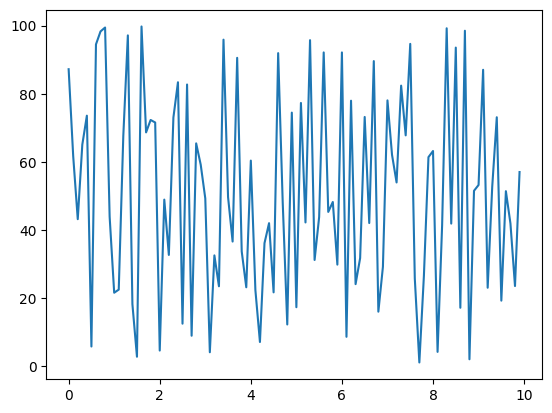

In [1]:
import numpy as np
import matplotlib.pyplot as plt

tid = np.arange(0, 10, 0.1)
fart = np.random.uniform(0, 100, 100)  # Genererer 100 fartverdier mellom 0 og 100 km/t

maalinger = np.array([tid,fart])

def midtpunkt_integral_array(maalinger):
    h = maalinger[0,1]-maalinger[0,0] # NB: Dette funker kun hvis verdiene i rad [0] kommer jevnt
    
    sum_f = 0
    for i in range(len(maalinger[0])-1):
        sum_f += (maalinger[1,i]+maalinger[1,i+1]) / 2
    return h * sum_f

print(midtpunkt_integral_array(maalinger))

fig, ax = plt.subplots()

ax.plot(tid,fart)

plt.show()

## Tester ut metoden på noe vi vet riktig svar på

In [6]:
x = np.arange(1,4.01,0.01)
y = x**2 - 2*x + 2
data = np.array([x,y])
print(midtpunkt_integral_array(data))

12.000050000000032
